# 정렬

- 어떤 데이터들이 주어졌을 때 정해진 순서대로 나열하는 문제. 
- 실제 컴퓨터 분야에서는 숫자의 순서나 어휘의 순서대로 정렬한 다음 사용해야 되는 경우가 많이 있다.
- 데이터가 정렬되어 있지 않다면 이론상 무한개의 데이터를 다룰 수 있어야하는 DB의 경우 탐색을 할 때 어마어마한 시간이 소요되기 때문에 정렬은 굉장히 중요하다

버블정렬($n^2$), 삽입정렬($n^2$), 선택정렬($n^2$)

퀵정렬($nlogn$), 병합정렬($nlogn$), 힙정렬($nlogn$)

## 선택정렬
1. 주어진 데이터중, 최소값을 찾음
2. 해당 최소값을 데이터 맨 앞에 위치한 값과 교체함
3. 맨 앞의 위치를 뺀 나머지 데이터를 동일한 방법으로 반복함

<img src="https://upload.wikimedia.org/wikipedia/commons/9/94/Selection-Sort-Animation.gif" width=100>

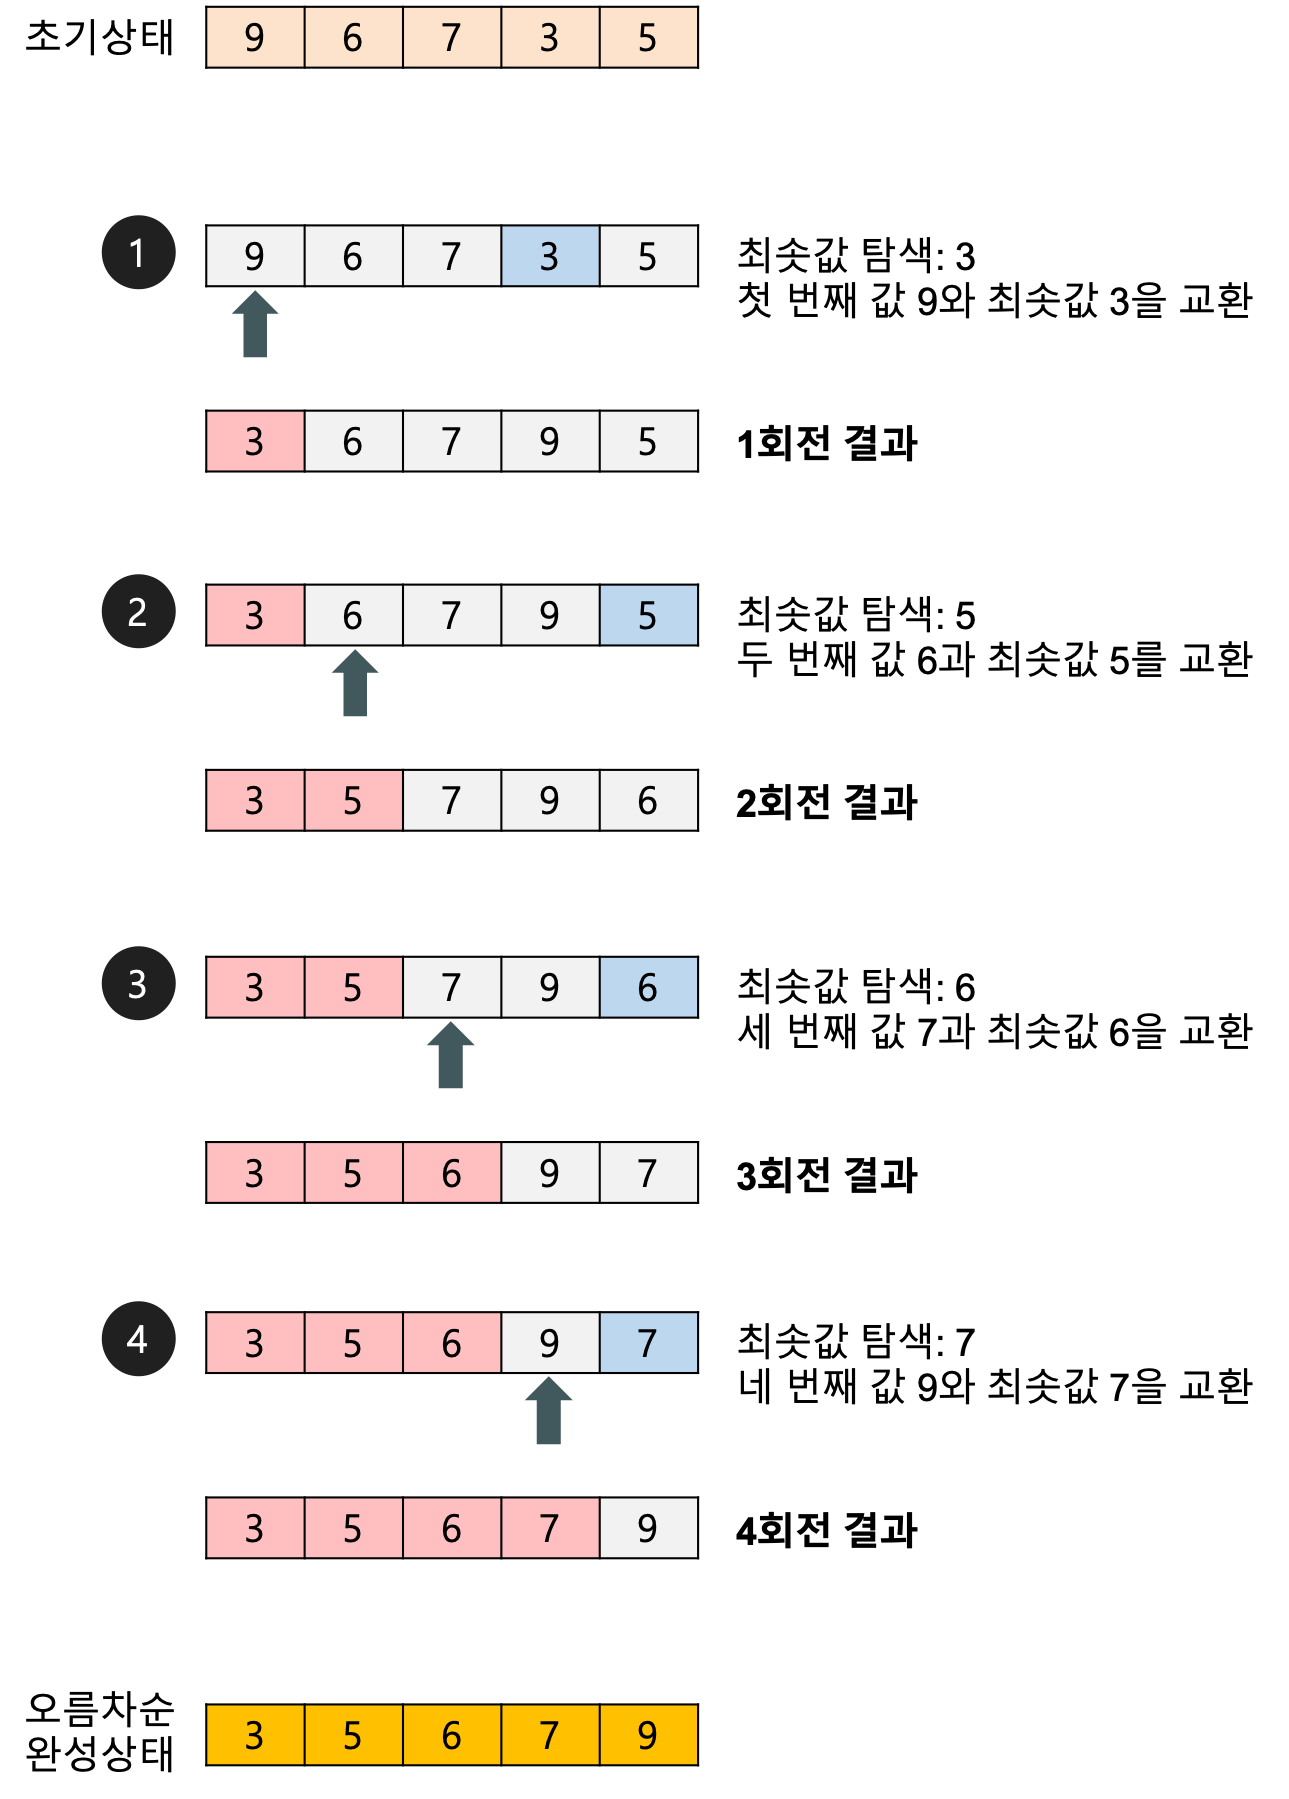

In [ ]:
def selectionSort(x):
	length = len(x)
	for i in range(length-1):
	    indexMin = i
        for j in range(i+1, length):
            if x[indexMin] > x[j]:
				indexMin = j
		x[i], x[indexMin] = x[indexMin], x[i]
	return x

## 버블정렬($O(n^2)$)
- 서로 인접한 두 원소를 검사하여 정렬하는 알고리즘

<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Bubble_sort_animation.gif" 
width=300>

<img src="https://www.fun-coding.org/00_Images/bubblealgo.png" />

In [ ]:
def bubbleSort(x):
    length = len(x)-1
    for i in range(length):
        for j in range(length-i):
            if x[j] > x[j+1]:
                x[j], x[j+1] = x[j+1], x[j]
    return x

* 반복문이 두 개 O($n^2$)
  - 최악의 경우, <font size=5em>$\frac { n * (n - 1)}{ 2 }$</font>
* 완전 정렬이 되어 있는 상태라면 최선은 O(n)

## 삽입정렬
* 삽입 정렬은 두 번째 인덱스부터 시작
* 해당 인덱스(key 값) 앞에 있는 데이터(B)부터 비교해서 key 값이 더 작으면, B값을 뒤 인덱스로 복사
* 이를 key 값이 더 큰 데이터를 만날때까지 반복, 그리고 큰 데이터를 만난 위치 바로 뒤에 key 값을 이동

|

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Insertion_sort_001.PNG">

In [ ]:
def insert_sort(x):
    for i in range(1, len(x)):
        j = i - 1
        key = x[i]
        while x[j] > key and j >= 0:
            x[j+1] = x[j]
            j = j - 1
        x[j+1] = key
    return x

## 퀵정렬
1.  리스트 안에 있는 원소를 골라 피벗이라고 한다.
2.  피벗을 기준으로 피벗보다 작은 원소들은 왼쪽으로 큰 원소들은 오른쪽으로 옮긴다.
3. 피벗을 제외한 왼쪽 리스트와 오른쪽 리스트를 다시 정렬한다.
4. 리스트의 크기가 0 또는 1이 될 때까지 반복한다.

<img src = "https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif"
     width = 400>

In [ ]:
def quicksort(x):
    if len(x) <= 1:
        return x

    pivot = x[len(x) // 2]
    less = []
    more = []
    equal = []
    for a in x:
        if a < pivot:
            less.append(a)
        elif a > pivot:
            more.append(a)
        else:
            equal.append(a)

    return quicksort(less) + equal + quicksort(more)

## 병합정렬
1. 정렬되지 않은 리스트를 각각 하나의 원소만 포함하는 n개의 부분리스트로 분할한다.
2. 부분리스트가 하나만 남을 때까지 반복해서 병합하여 정렬된 부분리스트를 생성한다. 마지막 남은 부분리스트가 정렬된 리스트이다.

<img src = "https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif"
     width = 400>

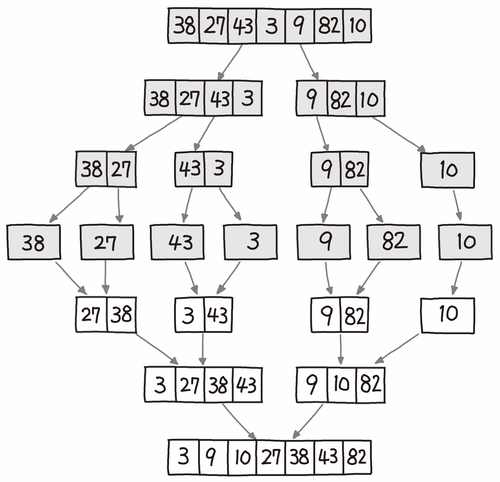

In [ ]:
def mergeSort(myList):
    if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        mergeSort(left)
        mergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1

## 힙정렬
1. n개의 노드에 대한 완전 이진 트리를 구성한다. 이때 루트 노드부터 부모노드, 왼쪽 자식노드, 오른쪽 자식노드 순으로 구성한다.
2. 최대 힙을 구성한다. 최대 힙이란 부모노드가 자식노드보다 큰 트리를 말하는데, 단말 노드를 자식노드로 가진 부모노드부터 구성하며 아래부터 루트까지 올라오며 순차적으로 만들어 갈 수 있다.
3. 가장 큰 수(루트에 위치)를 가장 작은 수와 교환한다.
4. 2와 3을 반복한다.

<img src='https://upload.wikimedia.org/wikipedia/commons/4/4d/Heapsort-example.gif'
     width=300>

In [ ]:
def heap_sort(array):
    n = len(array)
    # heap 구성
    for i in range(n):
        c = i
        while c != 0:
            r = (c-1)//2
            if (array[r] < array[c]):
                array[r], array[c] = array[c], array[r]
            c = r
    # 크기를 줄여가면서 heap 구성
    for j in range(n-1, -1, -1):
        array[0] , array[j] = array[j], array[0]
        r = 0
        c = 1
        while c<j:
            c = 2*r +1
            # 자식 중 더 큰 값 찾기
            if (c<j-1) and (array[c] < array[c+1]):
                c += 1
            # 루트보다 자식이 크다면 교환
            if (c<j) and (array[r] < array[c]):
                array[r], array[c] = array[c], array[r]
            r=c

## 눈으로 보자~
https://visualgo.net/en/sorting

## 파이썬 정렬
- 파이썬에서는 병합+삽입정렬인 Timsort알고리즘을 사용한다
https://d2.naver.com/helloworld/0315536

sorted(iterable)
list.sort()

In [ ]:
sorted([5, 2, 3, 1, 4])

[1, 2, 3, 4, 5]

In [ ]:
a = [5, 2, 3, 1, 4]
a.sort()
a

[1, 2, 3, 4, 5]

In [ ]:
sorted({1: 'D', 3: 'B', 2: 'B', 4: 'E', 5: 'A'})

[1, 2, 3, 4, 5]

In [ ]:
dict = {'a' : 'A', 'b' : 'B'}

### sort()은 오직 리스트에서만 쓸수 있는 반면 sorted()함수는 어떤(Iterable)에서든 쓸 수 있다!

In [ ]:
dict.sort()

AttributeError: 'dict' object has no attribute 'sort'

In [ ]:
sorted(dict)

['a', 'b']

### Key Functions

In [ ]:
sorted("This is a test string from Andrew".split(), key=str.lower)

['a', 'Andrew', 'from', 'is', 'string', 'test', 'This']

In [ ]:
sorted("This is a test string from Andrew".split(), key=len)

['a', 'is', 'This', 'test', 'from', 'string', 'Andrew']

In [ ]:
student_tuples = [
...     ('john', 'A', 15),
...     ('jane', 'B', 12),
...     ('dave', 'B', 10),
]

sorted(student_tuples, key=lambda student: student[2])

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

- student[2]인 숫자를 기준으로 정렬

In [ ]:
class Student:
    def __init__(self, name, grade, age):
        self.name = name
        self.grade = grade
        self.age = age
    def __repr__(self):
        return repr((self.name, self.grade, self.age))

In [ ]:
student_objects = [
    Student('john', 'A', 15),
    Student('jane', 'B', 12),
    Student('dave', 'B', 10),
]

sorted(student_objects, key=lambda student: student.age)

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [ ]:
sorted(student_tuples, key = lambda x : x[2])

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [ ]:
sorted(student_tuples, key = lambda x: (x[1], x[2]))

[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]

In [ ]:
sorted(student_tuples, key = lambda x: (x[1], -x[2]))

[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]

#### 정렬하려는 대상이 숫자일 경우 ' - ' 를 통해 reverse와 같은 효과를 낼 수 있다

### Operator Module Functions
파이썬 내장함수를 이용하여 원하는 원소를 기준으로 정렬할 수 있다. 

In [ ]:
from operator import itemgetter, attrgetter

In [ ]:
sorted(student_tuples, key=itemgetter(2))

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [ ]:
sorted(student_objects, key=attrgetter('age'))

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [ ]:
sorted(student_tuples, key=itemgetter(1, 2))

[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]

In [ ]:
sorted(student_objects, key=attrgetter('grade', 'age'))

[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]

### Ascending and Descending
- sort()와 sorted()는 모두 boolean값을 갖는 reverse 옵션을 갖고 있다. Default 값은 False로 오름차순이다!

In [ ]:
sorted(student_tuples, key=itemgetter(2), reverse=True)

[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]

In [ ]:
sorted(student_objects, key=attrgetter('age'), reverse=True)

[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]

# 프로그래머스 문제
https://programmers.co.kr/learn/courses/30/lessons/42748

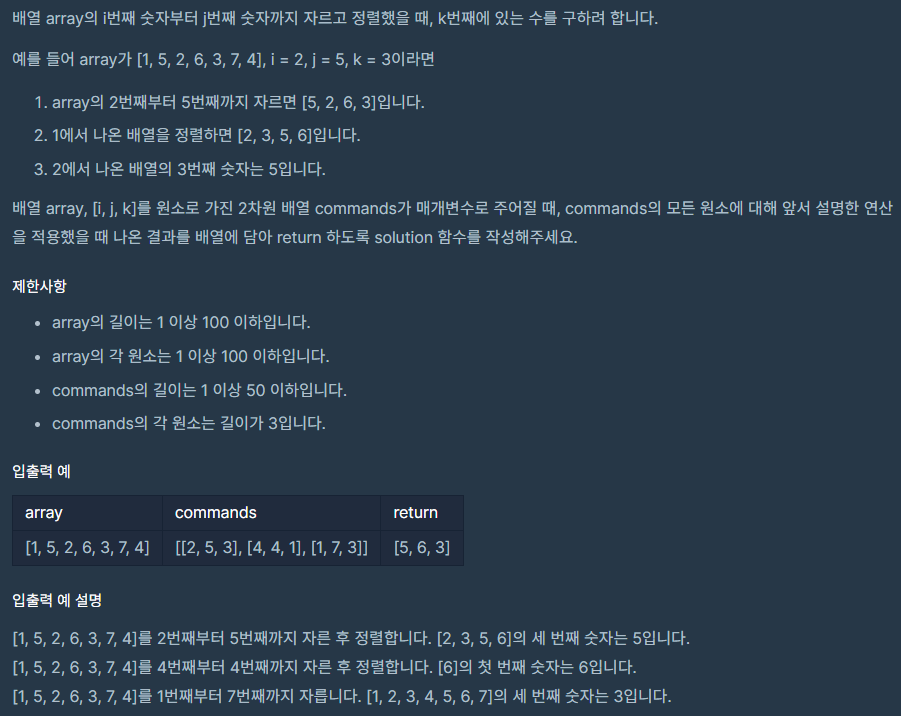